In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [174]:
data = pd.read_csv(r"C:\Users\user\Desktop\adult data.txt", sep=",", header=None)

In [175]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [176]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [121]:
data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [123]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [107]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
data.shape


(32561, 15)

In [134]:
data.drop(data.columns[[2]], axis=1, inplace=True)

In [135]:
data

,workclass,education,marital-status,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Own-child,White,Male,United-States,<=50K


In [138]:
dummy = pd.get_dummies(data, columns =['workclass','education','marital-status','relationship','race','sex','native-country'])

In [139]:
dummy.columns

Index(['class', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relatio

In [117]:
dummy

,education-num,class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,13,<=50K,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,13,<=50K,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,9,<=50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7,<=50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13,<=50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,<=50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,9,>50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,9,<=50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,9,<=50K,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
dummy.drop(dummy.columns[[1,44,46]], axis=1, inplace=True)

In [145]:
dummy

,class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,<=50K,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,<=50K,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,<=50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,<=50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,<=50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,<=50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,>50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,<=50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,<=50K,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
X = dummy.iloc[:,1:]

In [147]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
Y = dummy.iloc[:,0]

In [149]:
Y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0)

In [151]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [152]:
classifier.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [153]:
LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True,intercept_scaling=1, 
max_iter=100, multi_class='warn',
n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', random_state=0)

In [154]:
predicted_y = classifier.predict(X_test)

In [163]:
predicted_y

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [165]:
for x in range(len(predicted_y)):
    if (predicted_y[x] == ' >50K'):
        print(x, end="\t")

2	12	15	17	24	25	39	40	41	54	60	71	72	76	79	88	91	93	97	100	117	121	123	125	131	132	142	144	148	167	180	183	190	191	201	202	210	212	215	220	228	239	241	247	252	254	257	269	274	275	277	283	286	289	291	296	311	313	314	319	325	333	334	335	337	340	343	347	350	355	362	363	371	374	375	388	391	402	405	419	426	431	436	437	438	440	461	465	466	478	482	486	488	521	530	532	533	538	543	549	557	563	567	569	572	591	594	598	601	605	617	627	639	643	650	666	669	680	683	688	711	722	725	726	728	729	731	743	744	751	760	761	771	773	775	780	781	784	786	787	805	807	810	824	826	833	837	840	848	850	856	860	862	870	873	896	906	913	917	920	924	931	944	946	949	951	952	961	971	976	982	985	990	991	992	1001	1013	1027	1037	1042	1048	1049	1053	1056	1057	1077	1081	1085	1105	1107	1116	1118	1123	1126	1129	1142	1154	1155	1166	1171	1175	1179	1194	1209	1210	1217	1222	1241	1245	1247	1252	1267	1275	1283	1286	1289	1302	1311	1312	1325	1331	1338	1350	1351	1354	1356	1357	1358	1364	1367	1368	1375	1385	1387	1389	1392	1398	1407	1414	

In [166]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.82


In [167]:
cnf_matrix = metrics.confusion_matrix(Y_test, predicted_y)
cnf_matrix

array([[5774,  385],
       [1046,  936]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

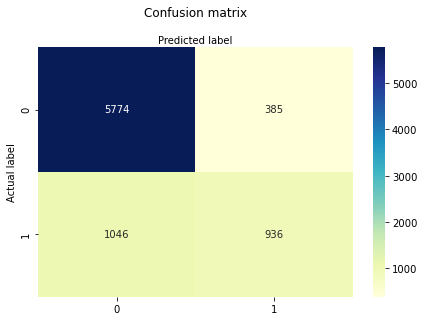

In [169]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [170]:
print("Accuracy:",metrics.accuracy_score(Y_test,  predicted_y))

Accuracy: 0.8242230684191131
